In [261]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import tarfile
import pathlib

In [262]:
# Inputs ETH
run_type = 'ov'

if run_type == 'brca':
   
    sample_target = 'TCGA-AO-A0JM-01A-21R-A056-07'
    basedir = '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TCGA_Breast_1102'
    #filtering_id = 'chosen_filters_06March_order' # OLD!!!!
elif run_type == 'ov':
    sample_target = 'TCGA-25-1319-01A-01R-1565-13'
    basedir = '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TCGA_Ovarian_374'
    filtering_id_STAR = 'filters_16_May_QUICK_STAR/'
    filtering_id_GP =  'filters_16_May_QUICK_INIT/'


In [263]:
# Inputs OHSU
path_filt_ohsu = f'output/kmer_files/J_{sample_target}_SampleLim0.0CohortLimNoneAcrossNone_FiltNormalsGtexCohortCohortlim0.0Across1.tsv'
tar_file_OHSU = '/cluster/work/grlab/projects/projects2020_OHSU/share_OHUS_PNLL/include_ANY_filters_OHSU-results_March22-2023/OHSU_March27-2023_fixAnyfilters_results.tar.gz'

In [264]:
# DEPRECATED WITH METADATA
# File obtained from 
# 1. Filtered kmer list 
# 2. Generation info
# 3. Added a lot of false positive related information in projects2020_ohsu/eth/debug/debug_false_positives/p20230307_filter_allRF_quality_check.ipynb
#metadata = 'metadata2'


#NEW NO METADATA
path_inter_eth_GP = os.path.join(basedir, 'filtering_intermediate/complete_cancer_candidates_order_r_complete.tsv.gz')
path_inter_eth_STAR = os.path.join(basedir, 'filtering_intermediate/complete_cancer_candidates_order_r_complete.STAR_GTEx.tsv.gz')

metadata = ''
path_filt_eth = f'G_{sample_target}_SampleLim0.0CohortLimAnyAcrossNone_FiltNormalsGtexCohortCohortlim0.0Across1{metadata}.tsv.gz'
path_filt_eth_STAR = os.path.join(basedir, 'filtering_samples', filtering_id_STAR, path_filt_eth)
path_filt_eth_GP = os.path.join(basedir, 'filtering_samples', filtering_id_GP, path_filt_eth)

In [265]:
# # Custom code with old metadata file
# custom_merge = True
# custom = '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TCGA_Ovarian_374/filtering_samples/filters_22March_order_wany_wAnnot/G_TCGA-25-1319-01A-01R-1565-13_SampleLim0.0CohortLimNoneAcrossNone_FiltNormalsGtexCohortCohortlim0.0Across1metadata2.tsv.gz'
# custom = pd.read_csv(custom, sep = '\t')
# custom.head()

# Load

In [269]:
# Read ETH Data
print(f'Reading {path_inter_eth_GP}')
df_inter_GP = pd.read_csv(path_inter_eth_GP, sep = '\t')
print(df_inter_GP.shape)
print(f'Reading {path_inter_eth_STAR}')
df_inter_STAR = pd.read_csv(path_inter_eth_STAR, sep = '\t')
print(df_inter_STAR.shape)

print(f'Reading {path_filt_eth_GP}')
df_filt_GP = pd.read_csv(path_filt_eth_GP, sep = '\t')
print(df_filt_GP.shape)

print(f'Reading {path_filt_eth_STAR}')
df_filt_STAR = pd.read_csv(path_filt_eth_STAR, sep = '\t')
print(df_filt_STAR.shape)




Reading /cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TCGA_Ovarian_374/filtering_intermediate/complete_cancer_candidates_order_r_complete.tsv.gz
(46132795, 24)
Reading /cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TCGA_Ovarian_374/filtering_intermediate/complete_cancer_candidates_order_r_complete.STAR_GTEx.tsv.gz
(646718, 30)
Reading /cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TCGA_Ovarian_374/filtering_samples/filters_16_May_QUICK_INIT/G_TCGA-25-1319-01A-01R-1565-13_SampleLim0.0CohortLimAnyAcrossNone_FiltNormalsGtexCohortCohortlim0.0Across1.tsv.gz
(131575, 4)
Reading /cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TCGA_Ovarian_374/filtering_samples/filters_16_May_QUICK_STAR/G_TCGA-25-1319-01A-01R-1565-13_SampleLim

In [270]:
I_GP = set(df_inter_GP['kmer'])
print(len(I_GP))
I_STAR = set(df_inter_STAR['kmer'])
print(len(I_STAR))
F_GP = set(df_filt_GP['kmer'])
print(len(F_GP))
F_STAR = set(df_filt_STAR['kmer'])
print(len(F_STAR))

2261461
461470
113574
52750


In [271]:
def set_compare(A, B, how = 'inter'):
    if how == 'inter':
        res = A.intersection(B)
        print('intersection')
    elif how == 'left':
        res = A.difference(B)
        print('left difference')
    elif how == 'right':
        res = B.difference(A)
        print('right difference')
    print(len(res))
    return res

In [272]:
print('--- Filtered STAR and Filtered GP ---') # IMPORTANT RESULT
res = set_compare(F_STAR, F_GP, how = 'inter')
res = set_compare(F_STAR, F_GP, how = 'left')
res = set_compare(F_STAR, F_GP, how = 'right')

--- Filtered STAR and Filtered GP ---
intersection
52430
left difference
320
right difference
61144


In [273]:
len(F_STAR.difference(F_GP)) # Multiple kmer backgrounds effect

320

In [274]:
len(F_GP.difference(F_STAR)) # PRUNING effect + 3-exon effect + Maybe some edge cases junctions

61144

In [275]:
print('--- Filtering GP ---')
res = set_compare(I_GP, F_GP, how = 'inter')
res = set_compare(I_GP, F_GP, how = 'left')
res = set_compare(I_GP, F_GP, how = 'right')

--- Filtering GP ---
intersection
113574
left difference
2147887
right difference
0


In [276]:
print('--- Filtering STAR ---')
res = set_compare(I_STAR, F_STAR, how = 'inter')
res = set_compare(I_STAR, F_STAR, how = 'left')
res = set_compare(I_STAR, F_STAR, how = 'right')


--- Filtering STAR ---
intersection
52750
left difference
408720
right difference
0


In [277]:
print('--- Intermediate STAR and GP ---')
res = set_compare(I_STAR, I_GP, how = 'inter')
res = set_compare(I_STAR, I_GP, how = 'left')
res = set_compare(I_STAR, I_GP, how = 'right')


--- Intermediate STAR and GP ---
intersection
461470
left difference
0
right difference
1799991


In [278]:
print('--- Intermediate STAR and Filtered GP ---')
res = set_compare(I_STAR, F_GP, how = 'inter')
res = set_compare(I_STAR, F_GP, how = 'left')
res = set_compare(I_STAR, F_GP, how = 'right')


--- Intermediate STAR and Filtered GP ---
intersection
113574
left difference
347896
right difference
0


In [279]:
print('--- Intermediate GP and Filtered STAR ---')
res = set_compare(I_GP, F_STAR, how = 'inter')
res = set_compare(I_GP, F_STAR, how = 'left')
res = set_compare(I_GP, F_STAR, how = 'right')


--- Intermediate GP and Filtered STAR ---
intersection
52750
left difference
2208711
right difference
0


In [280]:
print('--- intermediate reduced to output filter coordinates ---') 
print(df_inter_STAR.shape) 

print('- is not in STAR')
print(df_inter_STAR.loc[df_inter_STAR['gtexCohortfilter >0.0'].isna()].shape)


print('- is  in STAR')
print(df_inter_STAR.loc[~ df_inter_STAR['gtexCohortfilter >0.0'].isna()].shape)


--- intermediate reduced to output filter coordinates ---
(646718, 30)
- is not in STAR
(292275, 30)
- is  in STAR
(354443, 30)


In [281]:
inter_rf_WOstar = df_inter_STAR.loc[df_inter_STAR['gtexCohortfilter >0.0'].isna()]
inter_rf_star = df_inter_STAR.loc[~ df_inter_STAR['gtexCohortfilter >0.0'].isna()]
print(inter_rf_WOstar.shape)
print(inter_rf_star.shape)

(292275, 30)
(354443, 30)


In [282]:
# Merge generation matrix & filtered kmers
print(df_filt_GP.shape)
inter_rf_WOstar_filtered = inter_rf_WOstar.merge(df_filt_GP, on = list(df_filt_GP.columns), how = 'inner')
inter_rf_star_filtered = inter_rf_star.merge(df_filt_GP, on = list(df_filt_GP.columns), how = 'inner')
print(inter_rf_WOstar_filtered.shape)
print(inter_rf_star_filtered.shape)

(131575, 4)
(69334, 30)
(87937, 30)


In [283]:
inter_rf_WOstar_filtered.head()

,kmer,coord,junctionAnnotated,readFrameAnnotated,isCrossJunction,batch,cancerCohortfilter >0.0,cancerCohortfilter >=1.0,cancerCohortfilter >=2.0,cancerCohortfilter >=3.0,...,junction_coordinate2,junction_coordinate,strand_STAR,chr,gtexCohortfilter >0.0,gtexCohortfilter >=1.0,gtexCohortfilter >=2.0,gtexCohortfilter >=3.0,gtexCohortfilter >=5.0,gtexCohortfilter >=10.0
0,RMREATKGP,55350885:55350897:55352540:55352555:None:None,False,True,True,16543,2,2,2,2,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,QVERMREAT,55350876:55350897:55352540:55352546:None:None,False,True,True,16543,2,2,2,2,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,VERMREATK,55350879:55350897:55352540:55352549:None:None,False,True,True,16543,2,2,2,2,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MREATKGPV,55350888:55350897:55352540:55352558:None:None,False,True,True,16543,2,2,2,2,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,VQVERMREA,55350873:55350897:55352540:55352543:None:None,False,True,True,16543,2,2,2,2,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


GP filtering split based on STAR presence
recurrence cancer


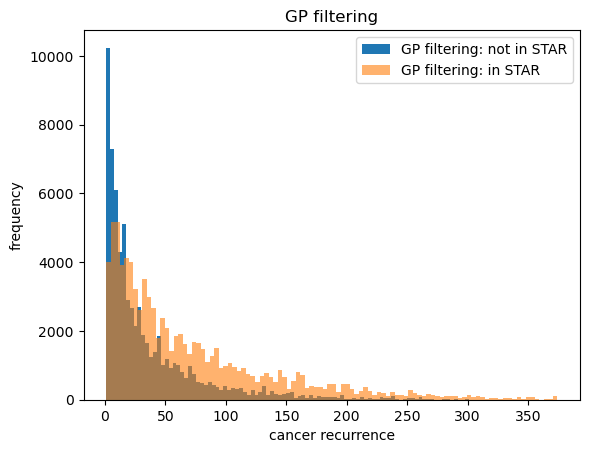

In [284]:
print('GP filtering split based on STAR presence')
print('recurrence cancer')
plt.title('GP filtering')
plt.hist(inter_rf_WOstar_filtered['cancerCohortfilter >0.0'], bins = 100, label = 'GP filtering: not in STAR')
plt.hist(inter_rf_star_filtered['cancerCohortfilter >0.0'], bins = 100, alpha = 0.6, label = 'GP filtering: in STAR')
plt.ylabel('frequency')
plt.xlabel('cancer recurrence')

plt.legend()
plt.show()

GP filtering split based on STAR presence
sample expression


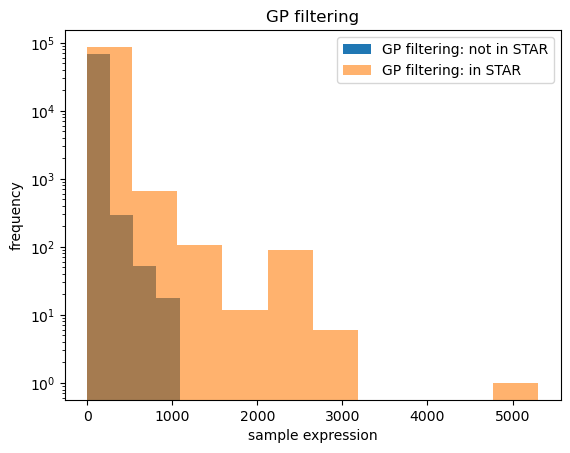

In [285]:
print('GP filtering split based on STAR presence')
print('sample expression')
plt.title('GP filtering')
plt.hist(inter_rf_WOstar_filtered['TCGA25131901A01R156513all'], bins = 4,  label = 'GP filtering: not in STAR')
plt.hist(inter_rf_star_filtered['TCGA25131901A01R156513all'], bins = 10, alpha = 0.6,  label = 'GP filtering: in STAR')
plt.legend()
plt.ylabel('frequency')
plt.xlabel('sample expression')
plt.yscale('log')
plt.show()

In [286]:
# Merge generation matrix & filtered kmers
inter_rf_starpipeline = df_inter_STAR.merge(df_filt_STAR, on = list(df_filt_STAR.columns), how = 'inner')
inter_rf_GPpipeline = df_inter_GP.merge(df_filt_GP, on = list(df_filt_GP.columns), how = 'inner')


Filtering STAR pipeline vs GP pipeline
Recurrence cancer


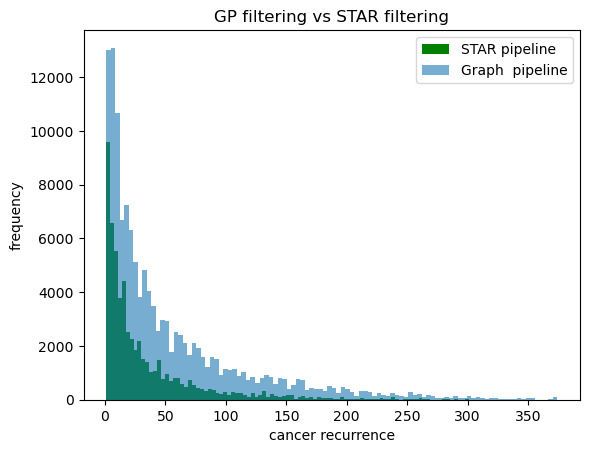

In [287]:
print('Filtering STAR pipeline vs GP pipeline')
print('Recurrence cancer')
plt.title('GP filtering vs STAR filtering')
plt.hist(inter_rf_starpipeline['cancerCohortfilter >0.0'], bins = 100, color = 'green', label = 'STAR pipeline')
plt.hist(inter_rf_GPpipeline['cancerCohortfilter >0.0'], bins = 100, alpha = 0.6, label = 'Graph  pipeline')
plt.legend()
plt.ylabel('frequency')
plt.xlabel('cancer recurrence')
plt.show()

Filtering STAR pipeline vs GP pipeline
sample expression


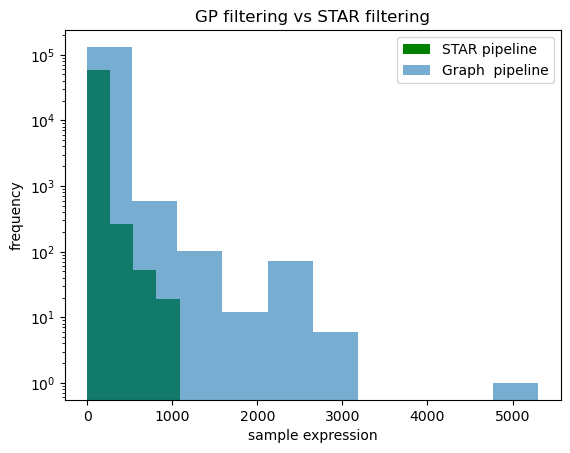

In [288]:
print('Filtering STAR pipeline vs GP pipeline')
print('sample expression')
plt.title('GP filtering vs STAR filtering')
plt.hist(inter_rf_starpipeline['TCGA25131901A01R156513all'], bins = 4, color = 'green', label = 'STAR pipeline')
plt.hist(inter_rf_GPpipeline['TCGA25131901A01R156513all'], bins = 10, alpha = 0.6, label = 'Graph  pipeline')
plt.legend()
plt.ylabel('frequency')
plt.xlabel('sample expression')
plt.yscale('log')
plt.show()

In [289]:
print('In GP filtering but not in STAR')
inter_rf_GPpipeline['kmer-type'] = ['3-exons' if 'None' in coord else '2-exons' \
                                     for coord in inter_rf_GPpipeline['coord']]
diff_GP_STAR = inter_rf_GPpipeline.set_index('kmer').loc[set_compare(F_STAR, F_GP, how = 'right'), :\
                                                        ].reset_index()
print(diff_GP_STAR.shape)
print(len(set(diff_GP_STAR['kmer'])))


In GP filtering but not in STAR
right difference
61144
(73341, 25)
61144


In [290]:
diff_GP_STAR['kmer-type'].describe()
## Seems to be mostly 3 exons stuff

count       73341
unique          2
top       3-exons
freq        47543
Name: kmer-type, dtype: object

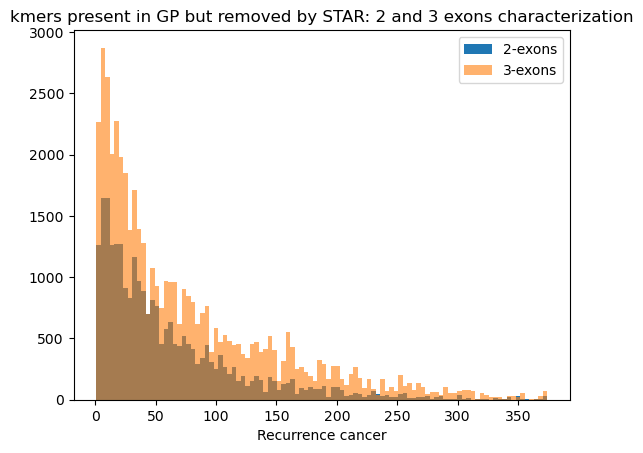

In [291]:
plt.title('kmers present in GP but removed by STAR: 2 and 3 exons characterization')
plt.xlabel('Recurrence cancer')
plt.hist(diff_GP_STAR.loc[diff_GP_STAR['kmer-type'] == '2-exons', 'cancerCohortfilter >0.0'], bins = 100, label = '2-exons')
plt.hist(diff_GP_STAR.loc[diff_GP_STAR['kmer-type'] == '3-exons', 'cancerCohortfilter >0.0'], bins = 100, alpha = 0.6, label = '3-exons')
plt.legend()
plt.show()

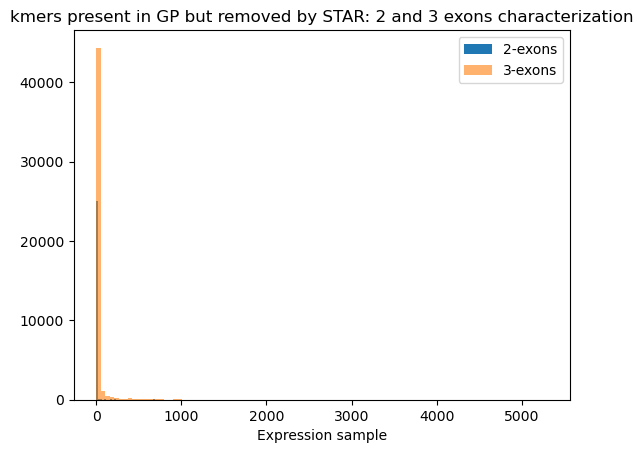

In [292]:
plt.title('kmers present in GP but removed by STAR: 2 and 3 exons characterization')
plt.xlabel('Expression sample')
plt.hist(diff_GP_STAR.loc[diff_GP_STAR['kmer-type'] == '2-exons', 'TCGA25131901A01R156513all'], bins = 100,  label = '2-exons')
plt.hist(diff_GP_STAR.loc[diff_GP_STAR['kmer-type'] == '3-exons', 'TCGA25131901A01R156513all'], bins = 100, alpha = 0.6, label = '3-exons')
plt.legend()
plt.show()

In [293]:
print('In STAR filtering but not in GP')
inter_rf_starpipeline['kmer-type'] = ['3-exons' if 'None' in coord else '2-exons' \
                                     for coord in inter_rf_starpipeline['coord']]
diff_STAR_GP = inter_rf_starpipeline.set_index('kmer').loc[set_compare(F_STAR, F_GP, how = 'left'), :\
                                                        ].reset_index()
print(diff_STAR_GP.shape)
print(len(set(diff_STAR_GP['kmer'])))


In STAR filtering but not in GP
left difference
320
(362, 31)
320


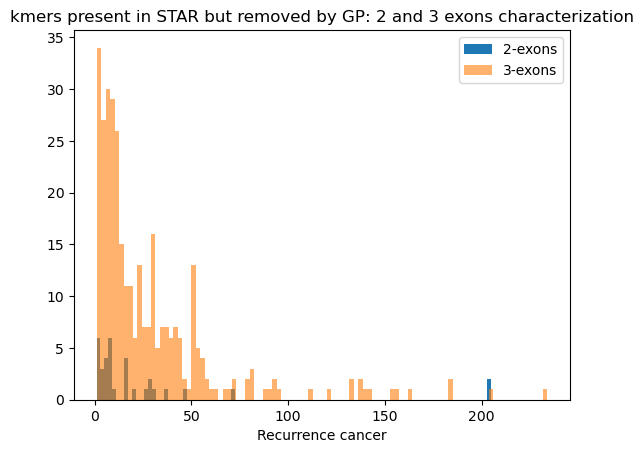

In [294]:
plt.title('kmers present in STAR but removed by GP: 2 and 3 exons characterization')
plt.xlabel('Recurrence cancer')
plt.hist(diff_STAR_GP.loc[diff_STAR_GP['kmer-type'] == '2-exons', 'cancerCohortfilter >0.0'], bins = 100 ,label = '2-exons')
plt.hist(diff_STAR_GP.loc[diff_STAR_GP['kmer-type'] == '3-exons', 'cancerCohortfilter >0.0'], bins = 100, alpha = 0.6, label = '3-exons')
plt.legend()
plt.show()

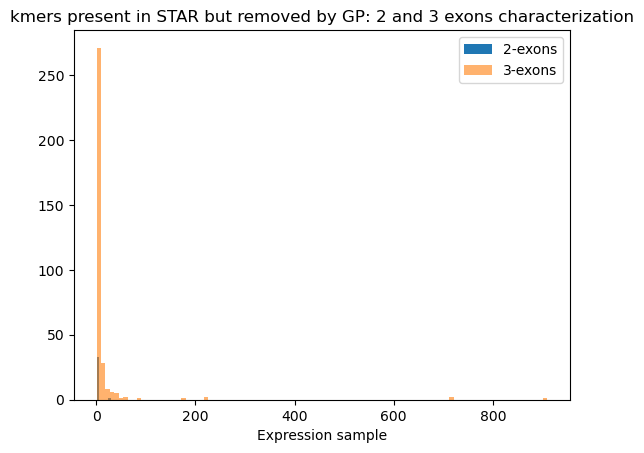

In [295]:
plt.title('kmers present in STAR but removed by GP: 2 and 3 exons characterization')
plt.xlabel('Expression sample')
plt.hist(diff_STAR_GP.loc[diff_STAR_GP['kmer-type'] == '2-exons', 'TCGA25131901A01R156513all'], bins = 5, label = '2-exons')
plt.hist(diff_STAR_GP.loc[diff_STAR_GP['kmer-type'] == '3-exons', 'TCGA25131901A01R156513all'], bins = 101, alpha = 0.6, label = '3-exons')
plt.legend()
plt.show()

In [296]:
# Ad-HOC Combination rule for filtered datasets
GPinSTAR_STARfilt = inter_rf_star_filtered.merge(df_filt_STAR, on = list(df_filt_STAR.columns), how = 'inner')
print(f'Out of {inter_rf_star_filtered.shape[0]} kmers-coordinates in STAR, {GPinSTAR_STARfilt.shape[0]} kmer-coordinates pass the STAR recurrence filter')
print(f'Not in STAR {inter_rf_WOstar_filtered.shape[0]}')
filt_caseSTAR = pd.concat([GPinSTAR_STARfilt, inter_rf_WOstar_filtered], axis = 0 )
print(f'Not in STAR + for those in STAR, checked if pass the expression filter on STAR files {filt_caseSTAR.shape[0]}')
unique_kmers = len(set(filt_caseSTAR['kmer']))
kmers_filt_caseSTAR = set(filt_caseSTAR['kmer'])
print(f'Corresponds to {unique_kmers} unique kmers')

Out of 87937 kmers-coordinates in STAR, 595 kmer-coordinates pass the STAR recurrence filter
Not in STAR 69334
Not in STAR + for those in STAR, checked if pass the expression filter on STAR files 69929
Corresponds to 61242 unique kmers


In [297]:
len(set(filt_caseSTAR['kmer']))

61242

In [298]:
# Intersection coord Combination rule for filtered datasets
intersect_STAR_GP = inter_rf_GPpipeline.merge(df_filt_STAR, on = list(df_filt_STAR.columns), how = 'inner')
print(f'Out of {inter_rf_GPpipeline.shape[0]} kmers-junctions in GP, {intersect_STAR_GP.shape[0]} pass the STAR recurrence filter')
unique_kmers = len(set(intersect_STAR_GP['kmer']))
kmers_intersect_STAR_GP = set(intersect_STAR_GP['kmer'])
print(f'Corresponds to {unique_kmers} unique kmers')

Out of 131995 kmers-junctions in GP, 58737 pass the STAR recurrence filter
Corresponds to 52430 unique kmers


In [299]:
# Intersection with coord Combination rule for filtered datasets
print('kmer strict')
intersect_STAR_GP_kmer = inter_rf_GPpipeline.merge(df_filt_STAR, on = ['kmer'], how = 'inner')
print(f'Out of {inter_rf_GPpipeline.shape[0]} kmers in GP, {intersect_STAR_GP_kmer.shape[0]} kmers pass the STAR recurrence filter')
unique_kmers = len(set(intersect_STAR_GP_kmer['kmer']))
kmers_intersect_STAR_GP_kmer = set(intersect_STAR_GP_kmer['kmer'])
print(f'Corresponds to {unique_kmers} unique kmers')

kmer strict
Out of 131995 kmers in GP, 71190 kmers pass the STAR recurrence filter
Corresponds to 52430 unique kmers


Compare "Intersection GP and STAR filtering" to "GP filtering adjusted for STAR filtering" 
Recurrence cancer


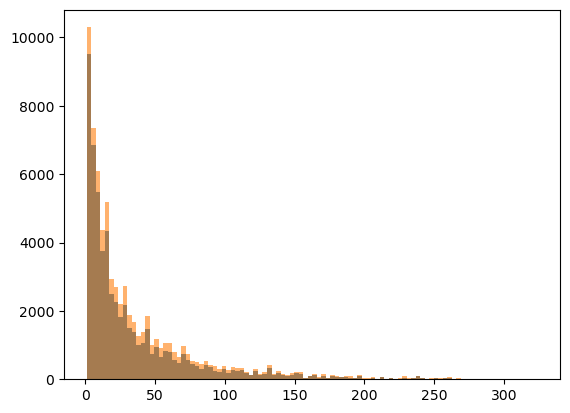

In [300]:
print('Compare "Intersection GP and STAR filtering" to "GP filtering adjusted for STAR filtering" ' )
print('Recurrence cancer')
plt.hist(intersect_STAR_GP['cancerCohortfilter >0.0'], bins = 100)
plt.hist(filt_caseSTAR['cancerCohortfilter >0.0'], bins = 100, alpha = 0.6)
plt.show()

(array([1.1085e+04, 8.0330e+03, 6.4410e+03, 4.4790e+03, 5.2840e+03,
        2.8420e+03, 2.7120e+03, 2.1780e+03, 2.6230e+03, 1.7970e+03,
        1.6670e+03, 1.1900e+03, 1.3780e+03, 1.8490e+03, 9.1800e+02,
        1.1940e+03, 8.2500e+02, 1.0720e+03, 1.0290e+03, 7.5900e+02,
        6.4300e+02, 9.2700e+02, 6.3300e+02, 5.3100e+02, 4.4600e+02,
        3.7500e+02, 5.1900e+02, 4.4400e+02, 3.3500e+02, 2.8100e+02,
        3.7100e+02, 1.7900e+02, 3.8300e+02, 3.1000e+02, 3.2200e+02,
        2.3700e+02, 1.5100e+02, 3.2300e+02, 1.4000e+02, 2.3800e+02,
        4.7200e+02, 1.7700e+02, 3.3500e+02, 1.3400e+02, 1.2900e+02,
        1.6100e+02, 2.7300e+02, 2.3900e+02, 3.1000e+01, 1.0000e+02,
        1.9100e+02, 6.3000e+01, 1.7600e+02, 3.6000e+01, 1.1800e+02,
        9.4000e+01, 6.2000e+01, 8.9000e+01, 4.7000e+01, 5.0000e+01,
        1.3500e+02, 1.9000e+01, 3.0000e+01, 4.4000e+01, 1.2000e+01,
        1.0800e+02, 1.2000e+01, 3.9000e+01, 1.3000e+01, 1.5000e+01,
        5.8000e+01, 3.3000e+01, 3.7000e+01, 1.75

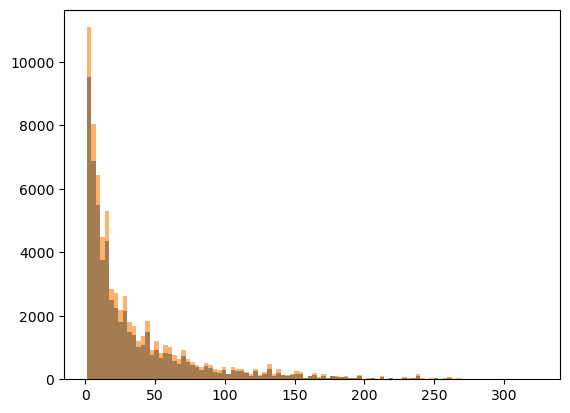

In [301]:
plt.hist(intersect_STAR_GP['cancerCohortfilter >0.0'], bins = 100)
plt.hist(intersect_STAR_GP_kmer['cancerCohortfilter >0.0'], bins = 100, alpha = 0.6)

(array([1.1085e+04, 8.0330e+03, 6.4410e+03, 4.4790e+03, 5.2840e+03,
        2.8420e+03, 2.7120e+03, 2.1780e+03, 2.6230e+03, 1.7970e+03,
        1.6670e+03, 1.1900e+03, 1.3780e+03, 1.8490e+03, 9.1800e+02,
        1.1940e+03, 8.2500e+02, 1.0720e+03, 1.0290e+03, 7.5900e+02,
        6.4300e+02, 9.2700e+02, 6.3300e+02, 5.3100e+02, 4.4600e+02,
        3.7500e+02, 5.1900e+02, 4.4400e+02, 3.3500e+02, 2.8100e+02,
        3.7100e+02, 1.7900e+02, 3.8300e+02, 3.1000e+02, 3.2200e+02,
        2.3700e+02, 1.5100e+02, 3.2300e+02, 1.4000e+02, 2.3800e+02,
        4.7200e+02, 1.7700e+02, 3.3500e+02, 1.3400e+02, 1.2900e+02,
        1.6100e+02, 2.7300e+02, 2.3900e+02, 3.1000e+01, 1.0000e+02,
        1.9100e+02, 6.3000e+01, 1.7600e+02, 3.6000e+01, 1.1800e+02,
        9.4000e+01, 6.2000e+01, 8.9000e+01, 4.7000e+01, 5.0000e+01,
        1.3500e+02, 1.9000e+01, 3.0000e+01, 4.4000e+01, 1.2000e+01,
        1.0800e+02, 1.2000e+01, 3.9000e+01, 1.3000e+01, 1.5000e+01,
        5.8000e+01, 3.3000e+01, 3.7000e+01, 1.75

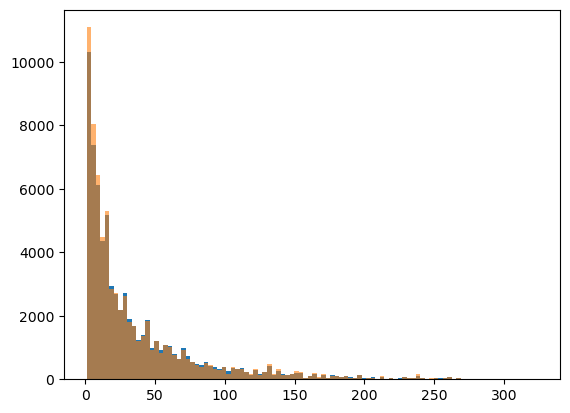

In [302]:
plt.hist(filt_caseSTAR['cancerCohortfilter >0.0'], bins = 100)
plt.hist(intersect_STAR_GP_kmer['cancerCohortfilter >0.0'], bins = 100, alpha = 0.6)
# OK THIS IS REALLY CLOSE 

expression sample


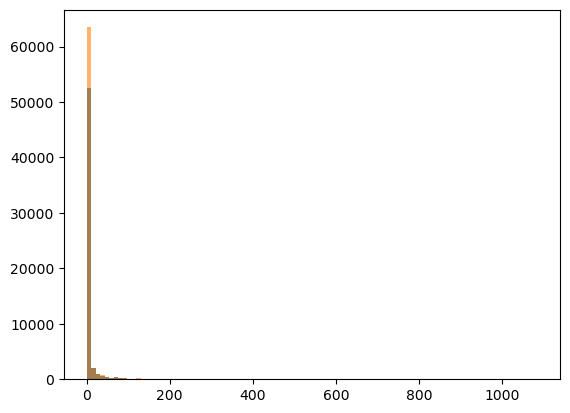

In [303]:
# print('Compare "Intersection GP and STAR filtering" to "GP filtering adjusted for STAR filtering" ' )
print('expression sample')
plt.hist(intersect_STAR_GP['TCGA25131901A01R156513all'], bins = 100)
plt.hist(filt_caseSTAR['TCGA25131901A01R156513all'], bins = 100, alpha = 0.6)
plt.show()

In [305]:
### ANALYZE THE DIFFERENCE BEtween doing the adjusted filtering and the intersection 
### Seems that it is mosly a difference in 2-exons kmers 
litigation_kmers = set_compare(set(filt_caseSTAR['kmer']), set(intersect_STAR_GP_kmer['kmer']), how = 'left')

litigation_kmers = filt_caseSTAR.set_index('kmer').loc[litigation_kmers].reset_index()
litigation_kmers['kmer-type'] = ['3-exons' if 'None' in coord else '2-exons' \
                                     for coord in litigation_kmers['coord']]
litigation_kmers['kmer-type'].describe()

left difference
8812


count       11429
unique          2
top       2-exons
freq         9397
Name: kmer-type, dtype: object

In [306]:
litigation_kmers


,kmer,coord,junctionAnnotated,readFrameAnnotated,isCrossJunction,batch,cancerCohortfilter >0.0,cancerCohortfilter >=1.0,cancerCohortfilter >=2.0,cancerCohortfilter >=3.0,...,junction_coordinate,strand_STAR,chr,gtexCohortfilter >0.0,gtexCohortfilter >=1.0,gtexCohortfilter >=2.0,gtexCohortfilter >=3.0,gtexCohortfilter >=5.0,gtexCohortfilter >=10.0,kmer-type
0,RIQPSFLGM,81511293:81511300:81511187:81511202:81511103:8...,True,False,True,25625,63,36,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2-exons
1,KKEKRMMKG,6769614:6769626:6770174:6770186:6770527:6770530,False,False,True,11351,21,10,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2-exons
2,KKEKRMMKG,6769614:6769626:6770174:6770187:6770470:6770472,False,False,True,11351,71,52,34,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2-exons
3,PGPHHRKED,35250456:35250465:35250648:35250659:35261924:3...,False,False,True,28472,12,6,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2-exons
4,HSLPRPSLG,241230256:241230264:241230203:241230207:241229...,False,False,True,34126,107,57,15,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2-exons
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11424,RSWPYTSQR,32334947:32334949:32334790:32334794:32334612:3...,False,False,True,1072,35,29,27,27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2-exons
11425,VFEKSPPSA,17862093:17862107:17862163:17862165:17862212:1...,False,False,True,27971,22,8,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2-exons
11426,GPQHAAAGK,228493252:228493274:228493970:228493975:None:None,False,False,True,4983,55,54,53,53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3-exons
11427,EGPGLQLCC,17404399:17404408:17403752:17403764:17403699:1...,False,False,True,27945,38,20,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2-exons


In [307]:
litigation_expr = df_inter_STAR.set_index('kmer').loc[set(litigation_kmers['kmer'])].reset_index()

In [308]:
litigation_expr

,kmer,coord,junctionAnnotated,readFrameAnnotated,isCrossJunction,batch,cancerCohortfilter >0.0,cancerCohortfilter >=1.0,cancerCohortfilter >=2.0,cancerCohortfilter >=3.0,...,junction_coordinate2,junction_coordinate,strand_STAR,chr,gtexCohortfilter >0.0,gtexCohortfilter >=1.0,gtexCohortfilter >=2.0,gtexCohortfilter >=3.0,gtexCohortfilter >=5.0,gtexCohortfilter >=10.0
0,RIQPSFLGM,81511293:81511300:81511187:81511202:81511103:8...,True,False,True,25625,63,36,5,1,...,81511108:81511187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,RIQPSFLGM,81511293:81511300:81511187:81511202:81511103:8...,True,False,True,25625,63,36,5,1,...,81511108:81511187,81511108:81511187,-,chr17,9476.0,9476.0,9476.0,9476.0,9476.0,9476.0
2,KKEKRMMKG,6769614:6769626:6770174:6770189:None:None,False,False,True,11351,187,182,176,170,...,None,6769626:6770174,+,chr12,222.0,222.0,219.0,217.0,214.0,202.0
3,KKEKRMMKG,6769614:6769626:6770174:6770189:None:None,False,True,True,11351,187,182,176,170,...,None,6769626:6770174,+,chr12,222.0,222.0,219.0,217.0,214.0,202.0
4,KKEKRMMKG,6769614:6769626:6770174:6770186:6770527:6770530,False,False,True,11351,21,10,2,1,...,6770186:6770527,6769626:6770174,+,chr12,222.0,222.0,219.0,217.0,214.0,202.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25239,GPQHAAAGK,228493252:228493274:228493970:228493974:228494...,False,False,True,4983,11,11,6,6,...,228493974:228494051,228493974:228494051,+,chr1,3.0,3.0,3.0,3.0,3.0,3.0
25240,EGPGLQLCC,17404399:17404408:17403752:17403764:17403699:1...,False,False,True,27945,38,20,4,1,...,17403705:17403752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25241,EGPGLQLCC,17404399:17404408:17403752:17403764:17403699:1...,False,False,True,27945,38,20,4,1,...,17403705:17403752,17403705:17403752,-,chr19,13.0,12.0,4.0,1.0,0.0,0.0
25242,LRAPQDEHG,76302870:76302880:76303025:76303027:76303818:7...,False,False,True,51201,16,6,1,0,...,76303027:76303818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(array([  0.,   0.,   0.,   0.,   0., 516.,   0.,   0.,   0.,   0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

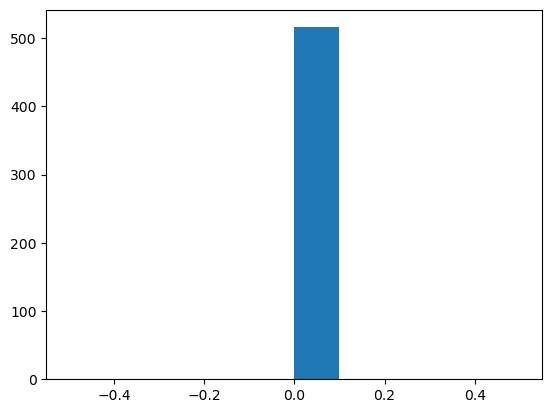

In [316]:
plt.hist(inter_rf_GPpipeline.merge(df_filt_STAR, on = ['kmer'], how = 'inner')['gtexCohortfilter >0.0'])  #PRUNED GTEX



(array([9544.,  368.,  225.,  127.,   66.,  144.,   59.,  129.,   69.,
        2310.]),
 array([   0. ,  947.6, 1895.2, 2842.8, 3790.4, 4738. , 5685.6, 6633.2,
        7580.8, 8528.4, 9476. ]),
 <BarContainer object of 10 artists>)

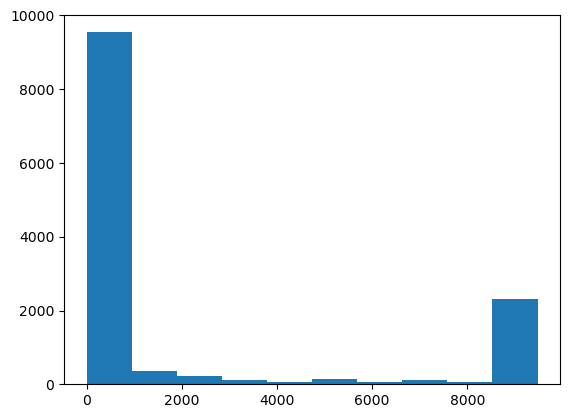

In [317]:
plt.hist(df_inter_STAR.set_index('kmer').loc[kmers_filt_caseSTAR\
                                            ].reset_index()['gtexCohortfilter >0.0']) #REAL GTEX

(array([  0.,   0.,   0.,   0.,   0., 171.,   0.,   0.,   0.,   0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

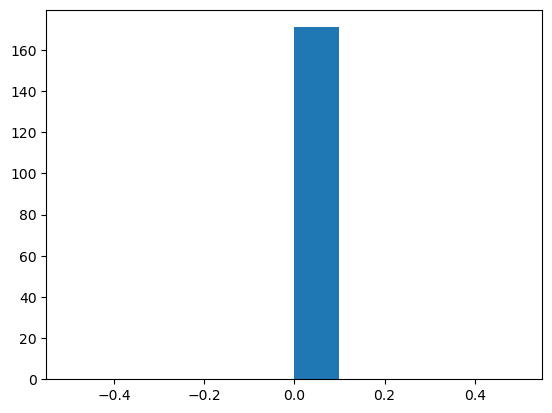

In [318]:
plt.hist(df_inter_GP.set_index('kmer').loc[kmers_filt_caseSTAR\
                                            ].reset_index()['gtexCohortfilter >0.0']) #PRUNED GTEX

(array([  0.,   0.,   0.,   0.,   0., 519.,   0.,   0.,   0.,   0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

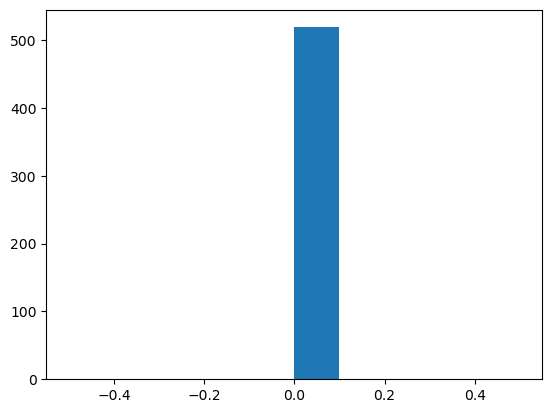

In [319]:
plt.hist(df_inter_STAR.set_index('kmer').loc[kmers_intersect_STAR_GP_kmer\
                                            ].reset_index()['gtexCohortfilter >0.0']) #REAL GTEX

(array([  0.,   0.,   0.,   0.,   0., 149.,   0.,   0.,   0.,   0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

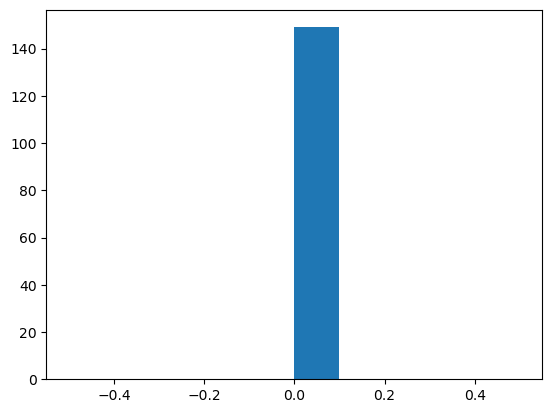

In [320]:
plt.hist(df_inter_GP.set_index('kmer').loc[kmers_intersect_STAR_GP_kmer\
                                            ].reset_index()['gtexCohortfilter >0.0']) #PRUNED GTEX

In [314]:
result_intersect_expre = df_inter_STAR.set_index('kmer').loc[kmers_intersect_STAR_GP_kmer\
                                            ].reset_index()

In [315]:
result_intersect_expre.loc[result_intersect_expre['gtexCohortfilter >0.0']> 1000]

,kmer,coord,junctionAnnotated,readFrameAnnotated,isCrossJunction,batch,cancerCohortfilter >0.0,cancerCohortfilter >=1.0,cancerCohortfilter >=2.0,cancerCohortfilter >=3.0,...,junction_coordinate2,junction_coordinate,strand_STAR,chr,gtexCohortfilter >0.0,gtexCohortfilter >=1.0,gtexCohortfilter >=2.0,gtexCohortfilter >=3.0,gtexCohortfilter >=5.0,gtexCohortfilter >=10.0
